Coef
 [0.41490802]


Bias
 -0.3575893142485458


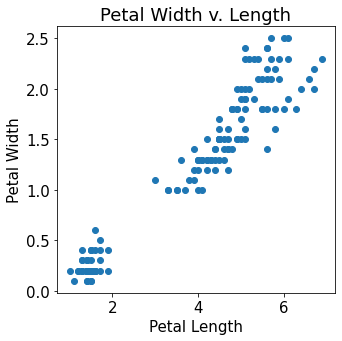

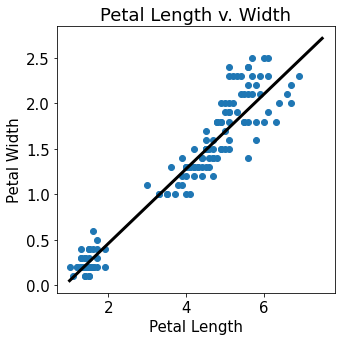

In [24]:
import numpy as np # Importamos librerías de manejo numérico y procesamiento de datos
import pandas as pd
import sklearn # nuestra librería base para utilizar algoritmos de machine learning
from sklearn import datasets # Importamos los datasets de scikit-learn
from sklearn import linear_model # manejo de regresión lineal/logística
from sklearn.ensemble import RandomForestClassifier # uso de clasificación de bosque aleatorio 
from sklearn.cluster import KMeans # para clusterización con k-means
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score # manejo del rendimiento (performance) de nuestros modelos
import matplotlib.pyplot as plt # Importamos librerías para graficar
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['font.size'] = 15 # Definimos el tamaño del graficado (opcional)
iris = datasets.load_iris() # Carga del Iris dataset
data = pd.DataFrame(data=iris.data, columns=iris.feature_names) # Creamos el DataFrame con los feature names
target = pd.DataFrame(data=iris.target, columns=['species']) # Creamos el DataFrame con los targets (las especies de la flor)
data = pd.concat([data, target], axis=1) # Unimos ambos DF con concat; agregamos una nueva columna
data = data.sample(frac=1, random_state=1234) # Mezclar en orden aleatorio

# Antes de comenzar a crear modelos, es importante dividir nuestro conjunto de datos en 
# Entrenamiento (Training) y Pruebas (Testing).

# Una buena regla general es que la mayoría de los datos deben incluirse en entrenamiento. 
# Los datos de entrenamiento se utilizan para ayudar a nuestros modelos a aprender las 
# "reglas" o patrones subyacentes dentro de los datos.

# El conjunto de pruebas debe separarse del conjunto de entrenamiento. Su objetivo es 
# evaluar el modelo que hizo, lo que significa que verificamos si los patrones detectados 
# en el modelo reflejan lo que estamos tratando de modelar.

# También recordemos que existe el término Validación (Validation). Esta separación del 
# dataset se usa típicamente para modelos más complicados donde se requieren parámetros 
# de ajuste (o los elementos clave) de un modelo. En el siguiente caso estos modelos son 
# lo suficientemente simples como para que datos de validación no sean necesaria.

# Una división del 80/20 por ciento de entrenamiento/pruebas suele ser razonable de manera 
# elemental. Realizamos esto:

# Fracción de entrenamiento 0.8.
Ntrain = int(data.shape[0] * 0.8)

# Datos de entrenamiento.
train = data.iloc[:Ntrain, :]

# Datos de prueba.
test = data.iloc[Ntrain:, :]

# Regresión Lineal
# La regresión lineal intenta predecir una salida de valor numérico. La especie de 
# la flor es una etiqueta o label. Así que intentemos pensar en un modelo en el que 
# podamos predecir la salida de un número.

# Para este ejemplo, supongamos que queremos predecir petal width o ancho del pétalo 
# (Index = 3 en el DataFrame).

# Para comenzar, construyamos un modelo con solo 1 feature, el petal length o largo 
# del pétalo (Index = 2 en el DataFrame).

# Primero, observemos la relación entre petal length y petal width en los datos:

# Definimos variables para acceder de forma más simple a las columnas de nuestros features.
plength = data["petal length (cm)"]
pwidth = data["petal width (cm)"]

# Creamos la gráfica comparanco Petal lenght (eje x) contra Petal width (eje y)
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Width v. Length")
f.tight_layout()

# De lo anterior, podemos ver una relación lineal. Queremos cuantificar esta relación.

# En la gráfica anterior  x  es el Petal Lenght y  y  es el Petal Width. Queremos ajustar 
# un modelo a la forma  θ1∗x+θ0=y , la ecuación de la recta para generar nuestra regresión lineal.

# Podemos utilizar scikit-earn para construir un modelo de regresión lineal como tenemos
# a continuación:

# NOTA: aparecerá un molesto mensaje de error ya que scikit-learn espera un input 2D 
# (N x 1) por eso llamamos "DataFrame" en el x-input para ajustar el comando.

# Importar un objeto de regresión lineal de sklearn.
model_1 = linear_model.LinearRegression()

# Ajustar el modelo a tus datos.
model_1.fit(pd.DataFrame(train.iloc[:, 2]), train.iloc[:, 3])

# Imprimir los coeficientes.
print("Coef\n", model_1.coef_)

# Imprimir el sesgo o bias.
print("\n\nBias\n", model_1.intercept_)

# El resultado anterior nos dice que  θ1 , la relación con el largo del pétalo, es  
# 0.41 , y que el bias (también llamado interceptar) es  −0.36 

# En conjunto, esperamos que la fórmula se vea así:

# θ1∗x+θ0=0.41∗x−0.36=y 

# Grafiquemos esto para observarlo:

# Definimos variables para acceder de forma más simple a las columnas de nuestros features.
plength = data["petal length (cm)"]
pwidth = data["petal width (cm)"]

# Definimos un arreglo desde el valor mímimo del petal length hasta el máximo 
# del petal lenght + 1, en pasos de 0.5.
xvals = np.arange(plength.min(), plength.max()+1, 0.5)

# Ecuación de nuestra regresión lineal.
yvals = 0.41*xvals - 0.36

# Gráficamos nuestra recta con los datos y nuestra ecuación.
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth)
ax.plot(xvals, yvals, 'k', linewidth=3)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length v. Width")
f.tight_layout()